In [1]:
import geopandas as gpd
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# bring in sweden shapefile
# data source: https://gadm.org/download_country_v3.html
gdf = gpd.read_file('data/gadm36_SWE_2.shp')

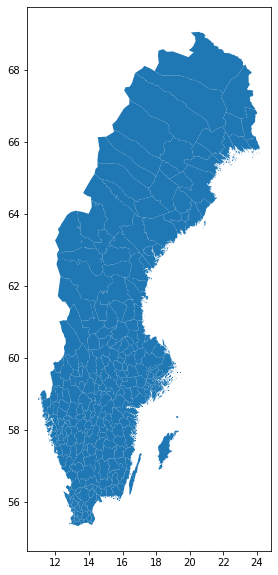

In [3]:
# plot it
gdf.plot(figsize=(10,10))

In [4]:
# get bounding bounds
minx,miny,maxx,maxy = gdf.total_bounds

In [5]:
# function to generate random points within a bounding box
def random_points_within(gdf, num_points):
    min_x, min_y, max_x, max_y = gdf.total_bounds
    
    df = pd.DataFrame(columns=('lon', 'lat'))

    for i in range(num_points):
        df.loc[i]=[random.uniform(min_x, max_x),random.uniform(min_y, max_y)]
    return df

In [6]:
# run the function to create 20 random points
df = random_points_within(gdf,20)

In [7]:
# convert it to a geodataframe for mapping
gdf_points = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.lon, df.lat),crs='epsg:4326')

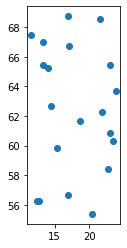

In [8]:
# plot the random points
gdf_points.plot()

(10.300838232040466, 24.83294606208801, 54.65011100769054, 69.74517555236828)

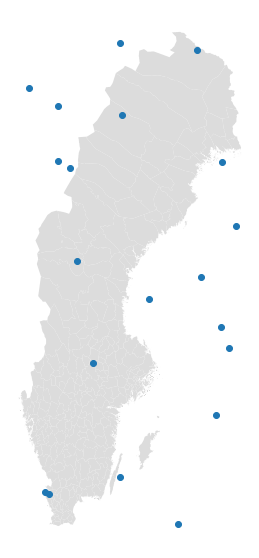

In [9]:
# map both layers
fig, ax = plt.subplots(figsize=(10,10))
gdf.plot(ax=ax,color='gainsboro')
gdf_points.plot(ax=ax)
ax.axis('off')